# BMI Predictor 🧮
---

## Exploratory Data Analysis 📇

In [7]:
# Libraries
import os
import sys
import pandas as pd
import logging
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')
logger = logging.getLogger(__name__)

# Get current directory
current_directory = os.getcwd()

# Project Root
project_root = os.path.abspath(os.path.join(current_directory, '..'))

logger.info(f"✅ Libraries imported successfully.")
logger.info(f"📁 Directory connected successfully.")

2025-11-02 22:14:46,290 - INFO - ✅ Libraries imported successfully.
2025-11-02 22:14:46,291 - INFO - 📁 Directory connected successfully.


## Import Dataset 🗒️

In [8]:
# -- Import dataset
data_file_path = os.path.join(project_root, 'data', 'bmi_cleaned.csv')

try:
    df_bmi = pd.read_csv(data_file_path)
    logger.info(f"✅ Dataset loaded successfully: {df_bmi.shape[0]} rows and {df_bmi.shape[1]} columns.")
except Exception as e:
    logger.error(f"❌ Failed to load dataset: {e}")
    logger.exception(e)

2025-11-02 22:16:36,193 - INFO - ✅ Dataset loaded successfully: 486 rows and 5 columns.


## Initial Data Exploration 🔍

In [10]:
df_bmi.head()

,Height,Weight,Index,BMI_Value,Gender_Encoded
0,174,96,4,31.71,0
1,189,87,2,24.36,0
2,185,110,4,32.14,1
3,195,104,3,27.35,1
4,149,61,3,27.48,0


# Data Analysis 📊

2025-11-02 22:33:19,923 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_29116\3152733717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Index', data=df_bmi, palette='viridis')
2025-11-02 22:33:19,930 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


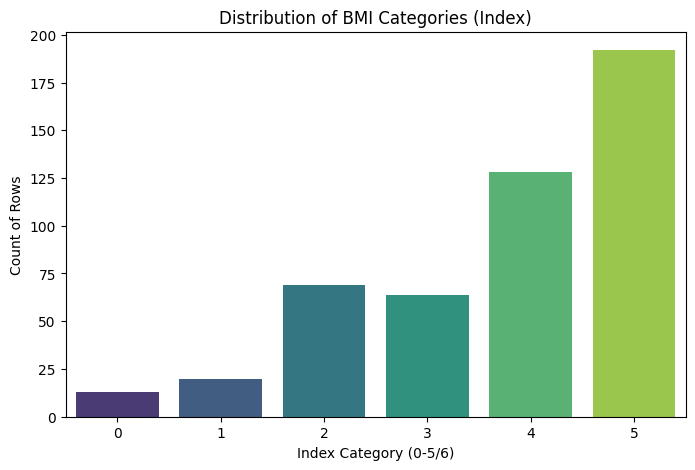

In [13]:
## 1. Visualizing the Distribution of the Target Variable (Index)
plt.figure(figsize=(8, 5))
sns.countplot(x='Index', data=df_bmi, palette='viridis')
plt.title('Distribution of BMI Categories (Index)')
plt.xlabel('Index Category (0-5/6)')
plt.ylabel('Count of Rows')
plt.show()

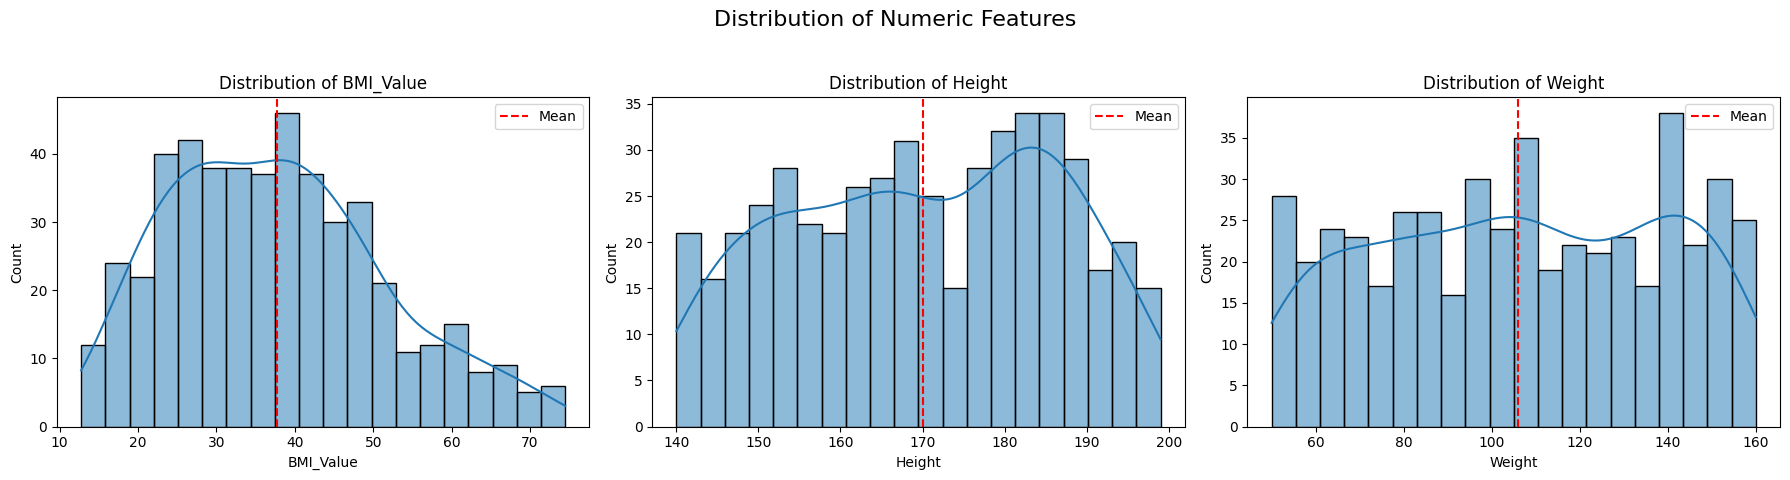

In [14]:
# 2. Univariate Analysis (Distribution of Characteristics)
numeric_cols = ['BMI_Value', 'Height', 'Weight']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Numeric Features', fontsize=16)

for i, col in enumerate(numeric_cols):
    sns.histplot(df_bmi[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].axvline(df_bmi[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

2025-11-02 22:35:46,991 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_29116\1863671018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Index', y='BMI_Value', data=df_bmi, palette='plasma')
2025-11-02 22:35:46,997 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


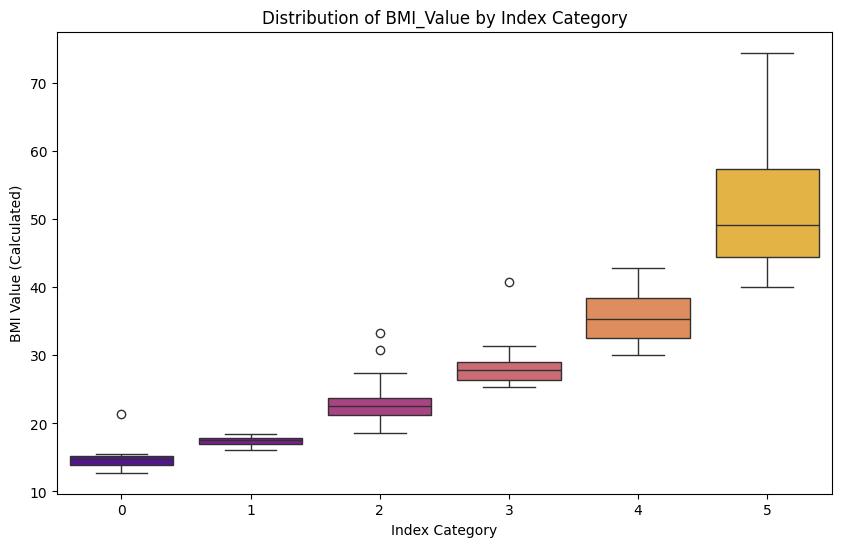

In [15]:
# 3. Bivariate Key Relationship (BMI_Value vs. Index)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Index', y='BMI_Value', data=df_bmi, palette='plasma')
plt.title('Distribution of BMI_Value by Index Category')
plt.xlabel('Index Category')
plt.ylabel('BMI Value (Calculated)')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_29116\1509419980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Label', y='BMI_Value', data=df_bmi, palette='coolwarm')


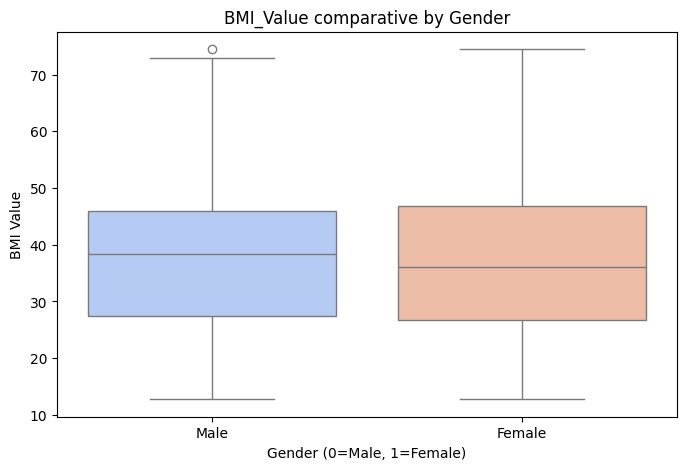

In [16]:
# 4. Gender Impact
plt.figure(figsize=(8, 5))
# Replace 0/1 with labels for the plot
df_bmi['Gender_Label'] = df_bmi['Gender_Encoded'].replace({0: 'Male', 1: 'Female'})

sns.boxplot(x='Gender_Label', y='BMI_Value', data=df_bmi, palette='coolwarm')
plt.title('BMI_Value comparative by Gender')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('BMI Value')
plt.show()

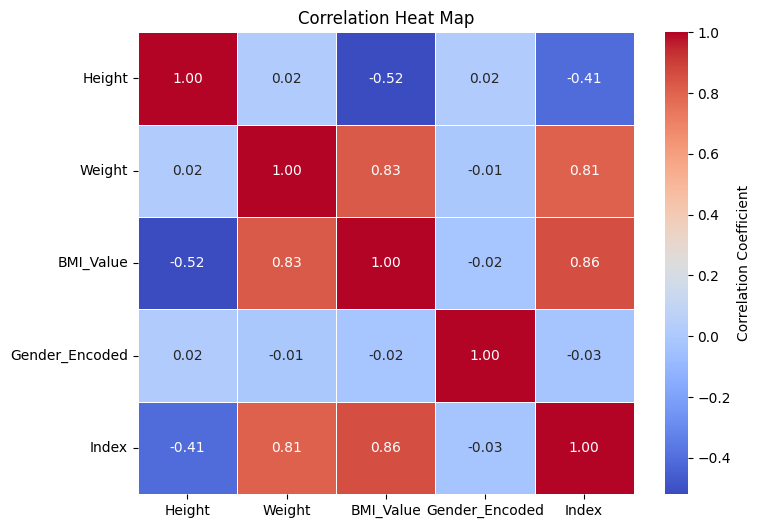

In [17]:
# 5. Correlation Heat Map
corr_cols = ['Height', 'Weight', 'BMI_Value', 'Gender_Encoded', 'Index']
correlation_matrix = df_bmi[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True, # Show correlation values
            cmap='coolwarm', 
            fmt=".2f", # Format to two decimal places
            linewidths=.5, # Lines between cells
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heat Map')
plt.show()